# Problem Set #3: Decomposition

## QR Decomposition:

### Problem 1[Fix]]

In [50]:
from scipy import linalg as la
import numpy as np

def QRdecom(A):
    m, n = A.shape
    Q = np.copy(A)
    R = np.zeros((n, n))
    for i in range(n):
        R[i, i] = la.norm(Q[:,i])
        Q[:, i] = Q[:, i] / R[i, i]
        for j in range(i +1, n):
            R[i,j] = np.dot(Q[:, j].T,  Q[:, i])
            Q[:,j] = Q[:,j] - (R[i, j] * Q[:, i])
    return Q, R
m, n = 6, 4
A = np.random.random((m,n))
Q, R = QRdecom(A)
Q2, R2 = la.qr(A, mode='economic')

print(Q2, "\n\n", R2, "\n")
print(Q, "\n\n", R, "\n")
print(np.allclose(np.triu(R), R))
print(np.allclose(Q.T @ Q, np.identity(n)))
print(np.allclose(Q @ R, A))


[[-0.57241493 -0.62861233  0.42182038  0.05383073]
 [-0.0602678  -0.29295881  0.01713844 -0.3274205 ]
 [-0.43933219 -0.11338033 -0.65036971  0.55138079]
 [-0.52106859  0.30222214  0.03180887 -0.51332358]
 [-0.45183415  0.59997708  0.06656384  0.03815135]
 [-0.00543907 -0.23421328 -0.62717663 -0.5664986 ]] 

 [[-1.68853256 -1.01815396 -1.3037569  -1.1168454 ]
 [ 0.         -0.6083841   0.154275   -0.12477668]
 [ 0.          0.         -0.61669062 -0.15191006]
 [ 0.          0.          0.         -0.40636649]] 

[[ 0.57241493  0.62861233 -0.42182038 -0.05383073]
 [ 0.0602678   0.29295881 -0.01713844  0.3274205 ]
 [ 0.43933219  0.11338033  0.65036971 -0.55138079]
 [ 0.52106859 -0.30222214 -0.03180887  0.51332358]
 [ 0.45183415 -0.59997708 -0.06656384 -0.03815135]
 [ 0.00543907  0.23421328  0.62717663  0.5664986 ]] 

 [[ 1.68853256  1.01815396  1.3037569   1.1168454 ]
 [ 0.          0.6083841  -0.154275    0.12477668]
 [ 0.          0.          0.61669062  0.15191006]
 [ 0.          0.   

### Problem 2[[Fix]]

In [58]:
m, n = 4, 4
A = np.random.random((m,n))
determinant = lambda A: abs(np.prod(np.diag(QRdecom(A)[1])))  
det = determinant(A)
print(det, abs(la.det(A)))

0.05179917425719887 0.051799174257198884


### Problem 3

In [60]:
def NLS(A, b):
    Q, R = la.qr(A, mode='economic')
    y = Q.T @ b
    return la.inv(R) @ y
m, n = 4, 4
A = np.random.random((m,n))
b = np.random.random(n)
print(NLS(A, b))
print(la.solve(A, b))

[-1.16108783  0.05834288 -1.39622933  2.21774957]
[-1.16108783  0.05834288 -1.39622933  2.21774957]


### Problem 4

In [73]:
sign = lambda x: 1 if x >= 0 else -1
def householder(A):
    m, n = A.shape
    R = A.copy()
    Q = np.identity(m)
    for k in range(n):
        u = R[k:, k].copy()
        u[0] = u[0] + sign(u[0]) * la.norm(u)
        u = u / la.norm(u)
        R[k:, k:] = R[k:, k:] - 2*np.outer(u, u.T @ R[k:,k:])
        Q[k:, :] = Q[k:, :] - 2*np.outer(u, u.T @ Q[k:,:])
    return Q.T, R

### Problem 
A = np.random.random((5, 3))
Q, R = la.qr(A)
print(Q,"\n", R)
Q2, R2 = householder(A)
print(Q2, R2)
np.allclose(Q2 @ R2, A)


[[-0.0946768  -0.0365099   0.35147697 -0.39675446 -0.84187479]
 [-0.1833428  -0.10914507  0.10578235  0.90351592 -0.356289  ]
 [-0.36510896  0.40990898 -0.78505447 -0.04445993 -0.28351873]
 [-0.09154719  0.87551861  0.4510638   0.08240847  0.12180541]
 [-0.9031812  -0.2284648   0.21331893 -0.13220076  0.2628413 ]] 
 [[-1.08105313 -1.02439961 -0.77301216]
 [ 0.          1.01324062  0.62891815]
 [ 0.          0.          0.38001688]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]
[[-0.0946768  -0.0365099   0.35147697 -0.39675446 -0.84187479]
 [-0.1833428  -0.10914507  0.10578235  0.90351592 -0.356289  ]
 [-0.36510896  0.40990898 -0.78505447 -0.04445993 -0.28351873]
 [-0.09154719  0.87551861  0.4510638   0.08240847  0.12180541]
 [-0.9031812  -0.2284648   0.21331893 -0.13220076  0.2628413 ]] [[-1.08105313e+00 -1.02439961e+00 -7.73012162e-01]
 [ 0.00000000e+00  1.01324062e+00  6.28918145e-01]
 [ 0.00000000e+00 -1.11022302e-16  3.80016878e-01]
 [ 0.00000000e+00

True

### Problem 5

In [80]:
sign = lambda x: 1 if x >= 0 else -1
def hessenberg(A):
    m, n = A.shape
    H = A.copy()
    Q = np.identity(m)
    for k in range(n-2):
        u = H[k + 1:, k].copy()
        u[0] = u[0] + sign(u[0]) * la.norm(u)
        u = u / la.norm(u)
        H[k+1:, k:] = H[k+1:,k:] - 2 *np.outer( u , u.T @ H[k+1:, k:])
        H[:, k+1:] = H[:, k+1:] - 2 * np.outer(H[:,k+1:] @ u, u.T)
        Q[k+1:, :] = Q[k+1:,:] - 2 * np.outer(u, u.T @ Q[k+1:,:])
    return H, Q.T
A = np.random.random((8,8))
H, Q = la.hessenberg(A, calc_q=True)
print(H, "\n", Q)
H2, Q2 = hessenberg(A)
print(H2, '\n', Q2)
np.allclose(np.triu(H2-1), H2)
np.allclose(Q2 @ H2 @ Q2.T, A)

[[ 8.04536542e-01 -3.78438616e-01  3.05565458e-01 -1.01689815e-01
  -1.42515439e-01 -2.17985825e-01 -2.07068781e-01 -5.81297544e-02]
 [-1.66542467e+00  3.07628136e+00 -9.81620373e-01 -1.61363603e-02
   3.70702943e-02  4.26772453e-02  1.07083961e-01 -7.72805619e-01]
 [ 0.00000000e+00 -1.77708307e+00  2.47804292e-01  1.82705148e-01
   1.24458927e-01  5.41200241e-01 -1.73022284e-01 -7.02353257e-01]
 [ 0.00000000e+00  0.00000000e+00 -6.52294828e-01  6.08008450e-01
  -2.48461444e-01 -7.91920486e-02 -2.05054388e-02  2.20826154e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.61379904e-01
   1.72614608e-01 -1.46308296e-01 -2.50337060e-01 -3.00352380e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.52251249e-01  8.66350458e-02  4.04611861e-02  6.85753182e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  4.12370882e-01 -2.02293126e-03 -2.00928278e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   

True

## Least Squares and Eigenvalues

### Problem 1

In [81]:
def least_sq(A, b):
    Q, R = QRdecom(A)
    return la.solve_triangular(R, Q.T @ b)
A = np.random.random((6, 4))
b = np.random.random((6))
x = least_sq(A, b)
print(x)

[ 0.68771935 -0.336517   -0.1006533   1.02591723]


### Problem 2

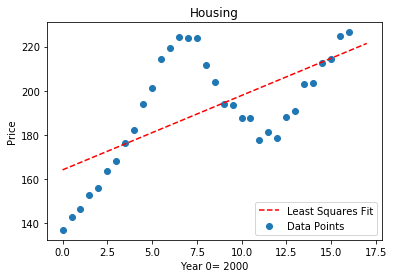

164.08096256684496 3.3747660427807467


In [118]:
import matplotlib.pyplot as plt

housing = np.load("housing.npy")
year = housing[:, 0]
price = housing[:, 1]
A = np.column_stack((year, np.ones(len(year))))
b = price
x = least_sq(A, b)

plt.scatter(year, price, label='Data Points')
predict_y = x[1] + x[0] * np.linspace(0, 17, 50)
plt.plot(np.linspace(0, 17, 50), predict_y, 'r--', label="Least Squares Fit")
plt.xlabel("Year 0= 2000")
plt.legend()
plt.ylabel("Price")
plt.title("Housing")
plt.show()
print(x[1], x[0])

### Problem 3

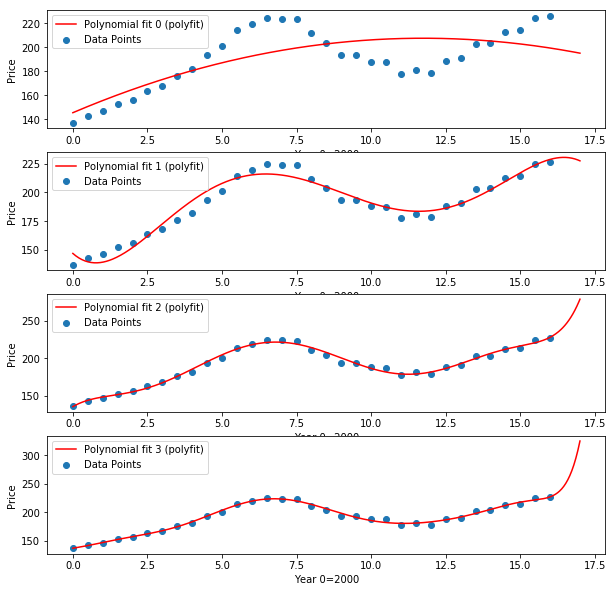

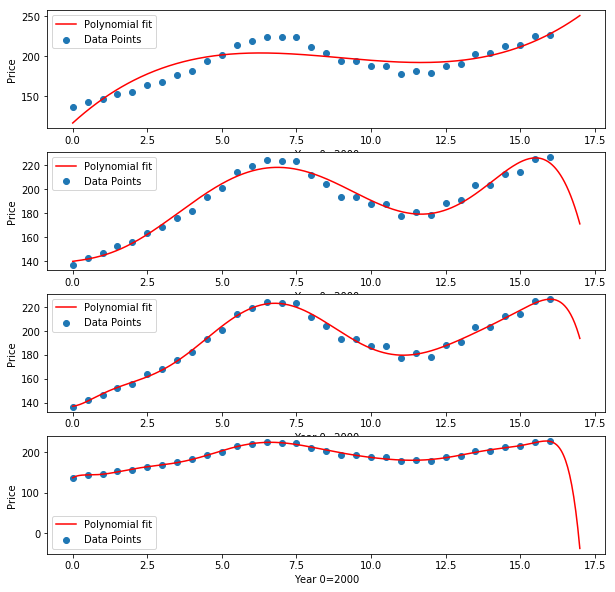

In [177]:
def polyfit(n, A, b):
    fig, axes = plt.subplots(4, 1, figsize=(10, 10))
    for i in range(len(n)):
        Apoly = np.vander(A, n[i])
        x = la.lstsq(Apoly, b)[0]
        xrange = np.linspace(0, 17, 500)
        poly = np.poly1d(x)
        axes[i].scatter(A, b, label="Data Points")
        axes[i].plot(xrange, poly(xrange), color='red', label=f"Polynomial fit {i} (polyfit)")
        axes[i].legend()
        axes[i].set_xlabel("Year 0=2000")
        axes[i].set_ylabel("Price")
    plt.show()
    return 

year = housing[:, 0]
price = housing[:, 1]
b = price
n = [3, 6, 9, 12]
polyfit(n, year, price)

fig, axes = plt.subplots(4, 1, figsize=(10, 10))
xrange = np.linspace(0, 17, 500)
for i in range(len(n)):  
    axes[i].scatter(year, price, label="Data Points")
    f = np.poly1d(np.polyfit(year, price, n[i]))
    axes[i].plot(xrange, f(xrange), color='red', label="Polynomial fit")
    axes[i].legend()
    axes[i].set_xlabel("Year 0=2000")
    axes[i].set_ylabel("Price")
plt.show()

### Problem 4

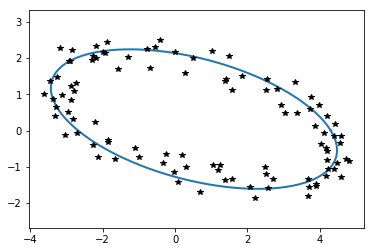

In [199]:
ellipse = np.load("ellipse.npy")

def plot_ellipse(a, b, c, d, e):
    """Plot an ellipse of the form ax^2 + bx + cxy + dy + ey^2 = 1"""
    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A)) / (2*A)
    plt.plot(r*cos_t, r*sin_t, lw=2)
    plt.gca().set_aspect("equal", "datalim")

def estimate_ellipse(ellipse):
    """Estimate the parameters of an ellipse"""
    X = ellipse[:, 0]
    Y = ellipse[:, 1]
    A = np.column_stack((X**2, X, X*Y, Y, Y**2))
    b = np.ones_like(X)
    beta = la.lstsq(A, b)[0]
    plot_ellipse(beta[0], beta[1], beta[2], beta[3], beta[4])
    plt.plot(X, Y, 'k*')
    plt.axis("equal")
    plt.show()
    
estimate_ellipse(ellipse)

### Problem 5

In [247]:
def Power_Method(A, tol, N=1000):
    m, n = np.shape(A)
    x = np.random.random(n)
    x = x / la.norm(x)
    difference = 1e5
    i = 0
    while (tol < difference) and (i < N):
        xold = x
        x = A @ x
        x = x / la.norm(x)
        difference = la.norm(x - xold)
        i += 1
    print(i, difference)
    return x.T @ A @ x, x
A = np.random.random((10, 10))
lamb1, x1 = Power_Method(A, 1e-12)
print(np.allclose(A @ x1, lamb1 * x1))
eigs, vecs = la.eig(A)
loc = np.argmax(eigs)
lamb2, x2 = eigs[loc], vecs[:, loc]
print(np.allclose(A @ x2, lamb2 * x2))


17 4.321302710954747e-13
True
True


### Problem 6

In [281]:
import cmath
def QR_Algorithm(A, N, tol):
    m, n = np.shape(A)
    S = la.hessenberg(A)
    for k in range(N):
        Q, R = la.qr(S)
        S = R @ Q
    eigs = []
    i = 0
    while (i < n):
        if (i == n - 1):
            eigs.append(S[i, i])
        elif (abs(S[i + 1, i]) < tol):
            eigs.append(S[i, i])
        else:
            moreeigs1 = ((S[i, i] + S[i + 1, i + 1]) + cmath.sqrt((S[i, i] + S[i + 1, i + 1])**2 - 4*(S[i, i]*S[i + 1, i + 1] - S[i, i + 1]*S[i + 1, i]))) / 2
            moreeigs2 = ((S[i, i] + S[i + 1, i + 1]) - cmath.sqrt((S[i, i] + S[i + 1, i + 1])**2 - 4*(S[i, i]*S[i + 1, i + 1] - S[i, i + 1]*S[i + 1, i]))) / 2
            eigs.append(moreeigs1)
            eigs.append(moreeigs2)
            i += 1
        i += 1
    return eigs

A = np.random.random((5, 5))
print(la.eig(A + A.T)[0])
print(QR_Algorithm(A + A.T, 1000, 1e-12))


[ 5.97902529+0.j  1.26194777+0.j -1.06382601+0.j -0.69710928+0.j
  0.21037613+0.j]
[5.979025288493066, 1.261947774765972, -1.063826007445352, -0.6971092798084775, 0.21037612565248853]


## The SVD and Image Compression

### Problem 1

In [370]:
import numpy as np
from scipy import linalg as la

def compact_SVD(A, tol):
    lamb, V = la.eig(A.conj().T @ A)
    sigma = np.sqrt(lamb)
    order = np.argsort(sigma)[::-1]
    sigma[order]
    V[order]
    r = np.sum(x > tol for x in sigma)
    sigma_pos = sigma[:r]
    V_pos = V[:, :r]
    U = (A @ V_pos) / sigma_pos
    return U, sigma_pos, V_pos.conj().T
A = np.random.random((10, 5))
U, SIGMA, VH = compact_SVD(A, 1e-12)
u2, sigma2, vh2 = la.svd(A, full_matrices=False)
print(U.shape, SIGMA.shape, VH.shape)
print(np.allclose(U.T @ U, np.identity(5)))
print(np.allclose(U @ np.diag(SIGMA) @ VH, A))
print(np.linalg.matrix_rank(A) == len(SIGMA))
#print(U,'\n', SIGMA, '\n', VH, '\n')
#print(u2,'\n', sigma2, '\n', vh2)


(10, 5) (5,) (5, 5)
True
True
True


### Problem 2

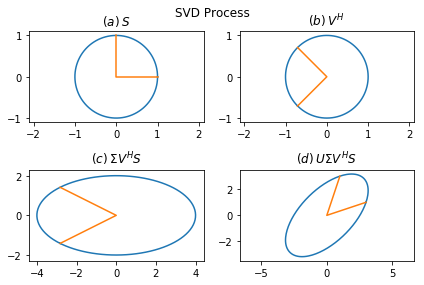

In [369]:
plt.ion()

def transform_uc(A):
    theta_range = np.linspace(0, 2 * np.pi, 200)
    S = np.array([np.cos(theta_range), np.sin(theta_range)])
    E = np.array([[1, 0, 0], [0, 0, 1]])
    U, s, Vh = la.svd(A)
    s = np.diag(s)
    fig, axes = plt.subplots(2, 2)
    axes[0][0].plot(S[0], S[1])
    axes[0][0].plot(E[0], E[1])
    axes[0, 0].axis("equal")
    axes[0][1].plot((Vh @ S)[0], (Vh @ S)[1])
    axes[0][1].plot((Vh @ E)[0], (Vh @ E)[1])
    axes[0, 1].axis("equal")
    axes[1][0].plot((s @ Vh @ S)[0], (s @ Vh @ S)[1])
    axes[1][0].plot((s @ Vh @ E)[0], (s @ Vh @ E)[1])
    axes[1, 0].axis("equal")
    axes[1][1].plot((U @ s @ Vh @ S)[0], (U @ s @ Vh @ S)[1])
    axes[1][1].plot((U @ s @ Vh @ E)[0], (U @ s @ Vh @ E)[1])
    axes[1, 1].axis("equal")
    #axes[0][0].axis([-1.1, 1.1, -1.1, 1.1])
    #axes[1][0].axis([-1, 1, -1, 1])
    #axes[0][1].axis([-1, 1, -1, 1])
    #axes[1][1].axis([-1, 1, -1, 1])
    axes[0][0].set_title(r"$(a) \:S$")
    axes[0][1].set_title(r"$(b)\: V^H$")
    axes[1][0].set_title(r"$(c)\: \Sigma V^H S$")
    axes[1][1].set_title(r"$ (d)\:U\Sigma V^H S$")
    fig.suptitle("SVD Process")
    plt.tight_layout()
    plt.axis("equal")
    plt.show()
transform_uc(np.array([[3, 1],[1, 3]]))

### Problem 3

In [389]:
def trunc_SVD(A, s):
    U, sig, Vh = la.svd(A)
    U_s = U[:, :s]
    sig_s = sig[:s]
    Vh_s = Vh[:s, :]
    A_s = U_s @ np.diag(sig_s) @ Vh_s
    size = U_s.size + sig_s.size + Vh_s.size
    if s > len(sig):
        raise ValueError('You must enter in a number that has a higher rank than the matrix')
    return A_s, size

A = np.random.random((8, 8))
A_s, size = trunc_SVD(A, 4)
print(np.linalg.matrix_rank(A_s))
print(size)

4
68


### Problem 4

In [454]:
def optim_trunc_SVD(A, eps):
    U, sig, Vh = la.svd(A, full_matrices=False)
    s = (sig > eps).sum()
    U_s = U[:, :s]
    sig_s = sig[:s]
    Vh_s = Vh[:s, :]
    size = U_s.size + sig_s.size + Vh_s.size
    A_s = U_s @ np.diag(sig_s) @ Vh_s
    if eps <= np.min(sig):
        raise ValueError("A cannot be approximated within the tolerance by a matrix of lesser rank")
    return A_s, size

A = np.random.random((500, 500))
la.norm(A - optim_trunc_SVD(A, .05)[0])

0.0650132185522937

### Problem 5

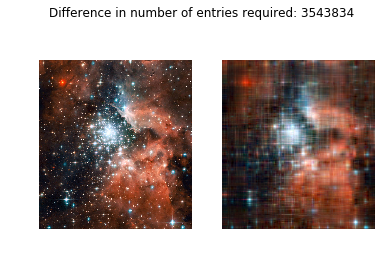

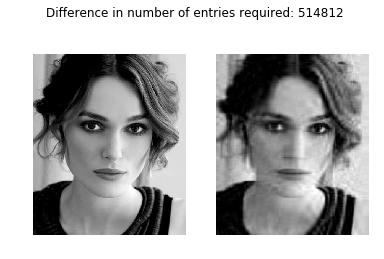

In [483]:
from matplotlib import pyplot as plt
def photo_res(filename, s):
    image = plt.imread(filename) / 255
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis('off')

    if len(image.shape) == 2:
        A_s, size = optim_trunc_SVD(image, s)
        np.clip(A_s, 0, 1)
        A_s = plt.subplot(1, 2, 2)
        plt.imshow(A_s)
        plt.axis("off")
        plt.suptitle(f"Difference in number of entries required: {image.size - size}")
        plt.show()
        
    elif len(image.shape) == 3:
        red_layer = image[:, :, 0]
        green_layer = image[:, :, 1]
        blue_layer = image[:, :, 2]
        A_sr, sizer = optim_trunc_SVD(red_layer, s)
        A_sg, sizeg = optim_trunc_SVD(green_layer, s)
        A_sb, sizeb = optim_trunc_SVD(blue_layer, s)
        A_s = np.dstack((A_sr, A_sg, A_sb))
        A_s = np.clip(A_s, 0, 1)
        size = sizer + sizeg + sizeb
        plt.subplot(1, 2, 2)
        plt.imshow(A_s)
        plt.axis("off")
        plt.suptitle(f"Difference in number of entries required: {image.size - size}")
        plt.show()
    else:
        print("Wrong dimensions")
    return

#photo_res("hubble_gray.jpg",5)
photo_res("hubble.jpg", 20)
photo_res("kiera.jpg", 5)


## The Drazin Inverse

### Problem 1

In [502]:
from numpy import linalg as alg
from scipy import linalg as la

def Drazin(A, index, A_D):
    if np.allclose(A @ A_D , A_D @ A):
        if np.allclose(alg.matrix_power(A, index + 1) @ A_D, alg.matrix_power(A, k)):
            if np.allclose(A_D @ A @ A_D , A_D):
                claim = True
            else:
                claim= False
        else:
            claim = False
    else:
        claim=False
    return claim
A = np.array([[1,3,0,0], [0,1,3,0],[0,0,1,3],[0,0,0,0]])
A_D = np.array([[1,-3,9,81],[0,1,-3,-18],[0,0,1,3],[0,0,0,0]])
k = 1
B = np.array([[1,1,3],[5,2,6],[-2,-1,-3]])
B_D = np.zeros((3,3))
k_2 = 3
print("A: ", Drazin(A, k, A_D))
print("B: ", Drazin(B, k_2, B_D))

A:  True
B:  False


### Problem 2

In [511]:
def DRAZIN(A, tol):
    m, n = np.shape(A)
    f = lambda x: abs(x) > tol
    Q_1, S, k_1 = la.schur(A, sort=f)
    g = lambda x: abs(x) <= tol
    Q_2, T, k_2 = la.schur(A, sort=g)
    U = np.hstack((S[:,:k_1], T[:,:(n - k_1)]))
    Uinv = alg.inv(U)
    V = Uinv @ A @ U
    Z = np.zeros((n, n))
    if k_1 != 0:
        Minv = alg.inv(V[:k_1, :k_1])
        Z[:k_1, :k_1] = Minv
    return U @ Z @ Uinv

In [512]:
DRAZIN(A, 1e-4)

array([[  1.,  -3.,   9.,  81.],
       [  0.,   1.,  -3., -18.],
       [  0.,   0.,   1.,   3.],
       [  0.,   0.,   0.,   0.]])

In [514]:
DRAZIN(B, 1e-3)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

### Problem 3

In [537]:
def effec_res(A):
    m, n = np.shape(A)
    L = np.sum(A, axis=1) * np.eye(n) - A
    R = np.empty((n, n))
    for i in range(n):
        Li = L.copy()
        Li[:, i] = np.identity(n)[:, i]
        LiD = DRAZIN(Li, 1e-8)
        R[:, i] = LiD.diagonal()
        
    for i in range(n):
        R[i, i] = 0
        
    return R

In [538]:
G1 = np.array([[0, 1, 0, 0], [1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0]])
G2 = np.array([[0, 1], [1, 0]])
G3 = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]])
G4 = np.array([[0, 3], [3, 0]])
G5 = np.array([[0, 2], [2, 0]])
G6 = np.array([[0, 4], [4, 0]])
print(effec_res(G1))
print(effec_res(G2))
print(effec_res(G3))
print(effec_res(G4))
print(effec_res(G5))
print(effec_res(G6))

[[0. 1. 2. 3.]
 [1. 0. 1. 2.]
 [2. 1. 0. 1.]
 [3. 2. 1. 0.]]
[[0. 1.]
 [1. 0.]]
[[0.         0.66666667 0.66666667]
 [0.66666667 0.         0.66666667]
 [0.66666667 0.66666667 0.        ]]
[[0.         0.33333333]
 [0.33333333 0.        ]]
[[0.  0.5]
 [0.5 0. ]]
[[0.   0.25]
 [0.25 0.  ]]


### Problem 4 & 5

In [11]:
import pandas as pd
import numpy as np

class LinkPredictor:
    """
    """
    def __init__(self, filename):           # This function is the constructor.
        """
        """
        self.file = pd.read_csv(filename, header=None)                # Initialize some attributes.
        m, n = self.file.shape

        nodes, index = np.unique(self.file, return_inverse = True)
        self.nodes = nodes
        self.length = len(nodes)
        adjen = np.zeros((self.length, self.length))
        for i in range(m):
            adjen[index[i, 0], index[i, 1]] = 1
            adjen[index[i, 1], index[i, 0]] = 1
        self.adjen = adjen
        
        self.R = effec_res(self.adjen)
        #self.Rmax = self.R.max()
        
    def predict_link(self, node=None):
        

## Page Rank

### Problem 1

In [12]:
social_network = LinkPredictor('social_network.csv')


IndexError: too many indices for array

In [10]:
sn = pd.read_csv("social_network.csv")
nodes, index = np.unique(sn, return_inverse = True)
print(nodes)
print(index)

['Abigail' 'Alan' 'Alexander' 'Anna' 'Brandon' 'Carol' 'Charles'
 'Christopher' 'Colin' 'Connor' 'Emily' 'Eric' 'Evan' 'Jake' 'Jane' 'John'
 'Madeleine' 'Mary' 'Max' 'Melanie' 'Oliver' 'Paul' 'Penelope' 'Piers'
 'Ruth' 'Sally' 'Sonia' 'Stephanie' 'Stephen' 'Theresa' 'Thomas' 'Tracey'
 'Trevor']
[23 20  0 20 23 27  0 27 20 27 23  5 23 19 23 28  5 28 19 28 23 25  0 25
 20 25 27 25 23 22 20 22 20  1 23 32  5 32 19 32 23 13 23 17 27 17 23  3
  0  3 20  3 27  3 19  9 28  9 23 15  0 15 23 11  0 11 23 21  0 21  8 14
 13 14 20 30  8 30 13 30 20  7  8  6  4  6  0 16 22 16 23 31 13 31 14 31
  7 31 20 26 22 26 24 26 12 26 18 26 29 26  2 26  8 26  6 26 16 26 31 26
 22 10  1 10  3 10 24 10 12 10 18 10 11 10 29 10  2 10  8 10  4 10 30 10
  7 10  6 10 16 10 31 10 26 10]


## Conditioning and Stability

### Problem 1

In [8]:
import sympy as sy
from matplotlib import pyplot as plt
import numpy as np
import scipy.linalg as la

In [547]:
def condition(A):
    U, sig, Vh = la.svd(A)
    sing_vals = la.svdvals(A)
    maxval = np.max(sing_vals)
    minval = np.min(sing_vals)
    kappa = maxval / minval
    if np.min(sing_vals) == 0:
        return np.inf
    else:
        return kappa
    

In [557]:
m, n = 6, 4
A = np.random.random((m, n))
B = np.array([[0, 0], [0, 0]])
print(np.linalg.cond(A))
print(condition(A))
print(condition(B))

10.814551039992484
10.814551039992484
inf


/Users/cacheellsworth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


### Problem 2

In [9]:
import sympy as sy
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la

In [10]:
def experiment( n=100):
        w_roots = np.arange(1, 21)
        
        x, i = sy.symbols('x i')
        w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
        w_coeffs = np.array(w.all_coeffs())
        avg_comp_abs = np.zeros(100)
        rel_cond_numb = np.zeros(100)
        
        for i in range(n):
            r = np.random.normal(loc=1, scale=1e-10, size=21)
            new_coeffs = w_coeffs * r
            w_roots = np.roots(np.poly1d(w_coeffs))
            new_roots = np.roots(np.poly1d(new_coeffs))
            plt.scatter(new_roots.real, new_roots.imag, color='k', marker='.', s =.2, label='')
            plt.xlabel("Real Axis")
            plt.ylabel("Imaginary Axis")
            
            avg_comp_abs[i] = la.norm(new_roots - w_roots, np.inf) / la.norm(new_coeffs - w_coeffs, np.inf)
            rel_cond_numb[i] = avg_comp_abs[i] * la.norm(w_coeffs, np.inf) / la.norm(w_roots, np.inf)
            
            if i == 99:
            
                plt.scatter(new_roots.real, new_roots.imag, color='k', marker='.', s= .2, label="Perturbed")
        plt.xlabel("Real Axis")
        plt.ylabel("Imaginary Axis")
        plt.scatter(w_roots.real, w_roots.imag, c='b', marker='o', s=20, label="Original")
        
        plt.legend(loc="upper left")
        plt.show()

        return avg_comp_abs, rel_cond_numb
        
     

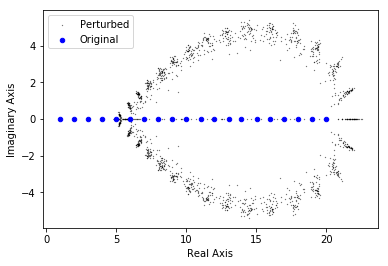

ACA :  3.4936211494581518e-09 2.2102029113555653e-08
RCN :  2411272986.363408 15254666566.694


In [11]:
aca, rcn = experiment()
print("ACA : ", aca.mean(), aca.max())
print("RCN : ", rcn.mean(), rcn.max())

### Problem 3

In [12]:
def perturbation(A):
    reals = np.random.normal(loc=0, scale=1e-10, size=A.shape)
    imags = np.random.normal(loc=0, scale=1e-10, size=A.shape)
    H = reals + 1j*imags
    eigvals = la.eigvals(A)
    eigvalsh = la.eigvals(A + H)
    khat = la.norm(eigvals - eigvalsh, 2) / la.norm(H, 2)
    k = (la.norm(A, 2) / la.norm(eigvals, 2)) * khat
    return khat, k

In [13]:
m, n = 5, 5
A = np.random.random((m, n))
ACA, RCN = perturbation(A)
print("ACA : ", ACA)
print("RCN : ", RCN)

ACA :  0.7044819423467414
RCN :  0.6936433560158409


### Problem 4

In [14]:
def resolution(bounds, res=200):
    RCN = np.zeros((res, res))
    x = np.linspace(bounds[0], bounds[1], res)
    y = np.linspace(bounds[2], bounds[3], res)
    for i in range(res):
        for j in range(res):
            RCN[i, j] = perturbation(np.array([[1, x[i]], [y[j], 1]]))[1]
    plt.pcolormesh(x, y, RCN, cmap="gray_r")
    plt.colorbar()
    plt.title("Condition Number- Resolution")
    plt.show()

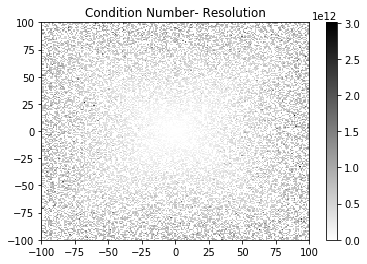

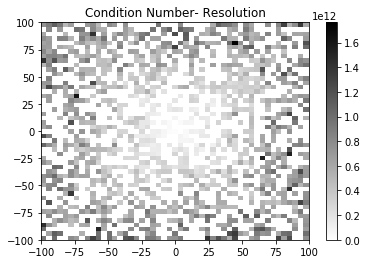

In [15]:
bounds = [-100, 100, -100, 100]
resolution(bounds, 200)
resolution(bounds, 50)

### Problem 5

In [20]:
def find_coeff(n):
    xk, yk = np.load("stability_data.npy").T
    A = np.vander(xk, n+1)
    xnorm = la.inv(A.T @ A) @ A.T @ yk
    error = la.norm(A @ xnorm - yk, 2)
    
    Q, R = la.qr(A, mode='economic')
    xnorm2 = la.solve_triangular(R, Q.T @ yk)
    error2 = la.norm(A @ xnorm2 - yk, 2)
    plt.scatter(xk, yk, color="k", marker='*', s=4)
    plt.plot(xk, np.polyval(xnorm, xk), label="Normal Equations")
    plt.plot(xk, np.polyval(xnorm2, xk), label="QR Solver")
    plt.legend()
    plt.xlim(0, 1)
    plt.ylim(0, 25)
    plt.title("Forward Error in Coefficent Error for Degree " + str(n))
    print("Error for 1: ", error)
    print("Error for 2: ", error2)
    plt.show()
    

Error for 1:  182.47535246459793
Error for 2:  4.593389524171301


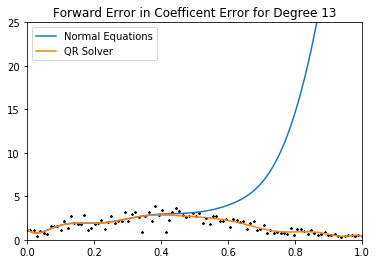

Error for 1:  4.649618797079317
Error for 2:  4.644309587544681


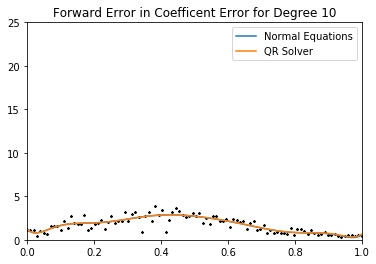

Error for 1:  21.105759497913752
Error for 2:  4.593408026933323


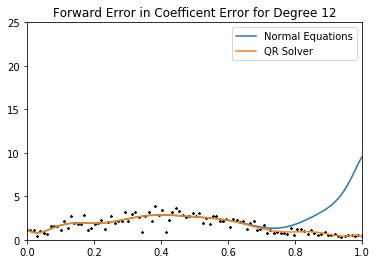

Error for 1:  31.201027095569668
Error for 2:  4.527556122356962


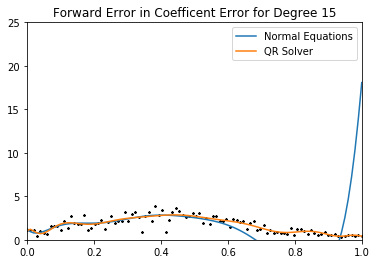

In [21]:
find_coeff(13)
find_coeff(10)
find_coeff(12)
find_coeff(15)

### Problem 6

[2.05391260e-15 5.03443121e-12 3.45521445e-06 1.28045545e+02
 3.70862144e-02 3.12796739e-02 2.70462894e-02 2.38227287e-02
 2.12860391e-02 1.92377544e-02]


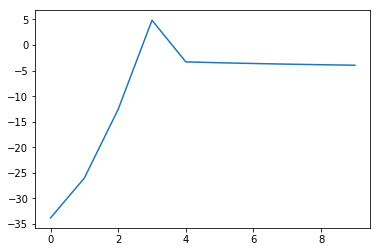

In [36]:

def integral():
    nrange = np.arange(5, 51, 5)
    I = np.empty(nrange.size)
    Inew = np.empty(nrange.size)
    error = np.empty(nrange.size)
    x = sy.Symbol('x')
    for i, n in enumerate(nrange):
        I[i] = sy.integrate(x**n * sy.exp(x - 1), (x, 0, 1))
        Inew[i] = ((-1)**int(n)) * sy.subfactorial(int(n)) + (-1) ** (int(n) + 1) * (sy.factorial(int(n)) / np.e)
        error[i] = np.abs(I[i] - Inew[i])
    return error   
errors = integral()
plt.plot(np.log(errors))
plt.show
print(errors)